<a href="https://colab.research.google.com/github/Pedreir/Trabalho-de-estat-stica/blob/main/Trabalho_da_bonita.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando as bibliotecas:

In [ ]:
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
from yellowbrick.regressor import ResidualsPlot #Biblioteca para visaulizar os resíduos
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
import statsmodels.formula.api as sn
from sklearn.model_selection import train_test_split 
import scipy.stats as stats


#Importando e tratando a base de dados:

In [ ]:
link = 'https://github.com/PrincesaQuequel/Trabalho_Estatistica/raw/main/dadabrutos_N_%20(4).csv'
df = pd.read_csv(link)
display(df)


,Unnamed: 0,Datein,FR(m3/dia),BODin (ppm),CODin (ppm),SSin(ppm),pHin,NAmin(ppm),NNin (ppm),Pin (ppm),Colin(ppm),Tin(°C),Condin L1,RF(mm),Pulp(ton/dia),Pap (ton/dia),...16,Dateout,BODout(ppm),CODout (ppm),SSout(ppm),Colout(ppm),Tout(°C),Condout,FRout(m3/dia),FRmod(m3/dia)
0,1,1996-09-01,79757,236.0,465.0,NaN,6.65,NaN,NaN,NaN,356.0,NaN,1180.0,4.8,878.130,962.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1996-09-02,78818,270.0,483.0,NaN,6.04,NaN,0.2600,NaN,433.0,43.0,1230.0,1.5,925.600,986.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1996-09-03,82039,292.0,571.0,NaN,5.39,NaN,0.2900,NaN,287.0,43.5,1030.0,39.7,972.600,1065.0,NaN,35311.0,74.0,245.0,NaN,311.0,33.5,1190.0,84096.8495,NaN
3,4,1996-09-04,79501,264.0,461.0,NaN,5.92,NaN,0.7500,NaN,406.0,43.0,1150.0,0.8,744.481,879.7,NaN,35312.0,88.0,237.0,NaN,298.0,33.0,1140.0,79542.4680,NaN
4,5,1996-09-05,82461,299.0,471.0,181.0,6.11,NaN,NaN,NaN,406.0,43.0,1210.0,26.1,891.033,985.8,NaN,35313.0,67.0,221.0,37.0,297.0,33.0,1115.0,83813.8935,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1425,1426,2000-07-27,52215,367.0,751.0,250.0,7.44,0.149,NaN,NaN,367.0,46.5,2150.0,0.1,1024.428,1077.7,NaN,36734.0,159.0,476.0,NaN,159.0,32.0,2230.0,52220.1835,NaN
1426,1427,2000-07-28,53216,324.0,751.0,145.0,7.38,0.192,NaN,1.54,324.0,46.5,2160.0,0.0,930.500,945.4,NaN,36735.0,150.0,478.0,NaN,150.0,32.0,2390.0,53216.0000,NaN
1427,1428,2000-07-29,51561,344.0,701.0,96.0,7.36,NaN,NaN,NaN,344.0,NaN,2230.0,0.0,974.120,1062.5,NaN,36736.0,137.0,446.0,NaN,137.0,32.0,2340.0,51561.0000,NaN
1428,1429,2000-07-30,51654,303.0,703.0,105.0,7.29,NaN,NaN,NaN,303.0,NaN,2290.0,0.0,1012.093,1061.8,NaN,36737.0,124.0,411.0,NaN,124.0,31.0,2270.0,51654.0000,NaN


In [ ]:
df = df.drop(columns=['Datein','Unnamed: 0','NNin (ppm)', 'Pin (ppm)', '...16', 'Dateout', 'SSout(ppm)'])
df["FR(m3/dia)"] = df["FR(m3/dia)"].astype('float64')
df.describe()

,FR(m3/dia),BODin (ppm),CODin (ppm),SSin(ppm),pHin,NAmin(ppm),Colin(ppm),Tin(°C),Condin L1,RF(mm),Pulp(ton/dia),Pap (ton/dia),BODout(ppm),CODout (ppm),Colout(ppm),Tout(°C),Condout,FRout(m3/dia),FRmod(m3/dia)
count,1430.000000,1341.000000,1341.000000,568.000000,1377.000000,660.000000,1379.000000,963.000000,1374.000000,1175.000000,1327.000000,1338.000000,1343.000000,1345.000000,1387.000000,1234.000000,1385.000000,1428.000000,1417.000000
mean,67358.606993,245.124787,561.387025,149.195423,7.450612,2.446463,464.403916,45.448629,1530.463610,4.820766,884.736728,1042.714720,85.189628,315.439405,418.200433,34.699352,1550.837545,67657.392690,67366.794032
std,11592.806906,46.345313,104.162825,85.737770,1.208718,1.766139,123.522396,3.067845,378.027858,11.502105,159.256485,94.085579,25.454019,73.550746,156.025704,2.275965,301.420834,11667.819267,9211.822536
min,4474.000000,41.000000,136.000000,12.000000,0.850000,0.000000,41.000000,28.000000,379.000000,0.000000,-48.000000,382.400000,16.000000,105.000000,32.000000,25.000000,222.000000,4474.000000,34678.428571
25%,62056.500000,219.000000,502.000000,90.000000,6.840000,1.200000,393.000000,44.500000,1305.000000,0.000000,861.843500,1003.875000,69.000000,281.000000,364.000000,33.000000,1352.000000,62211.135500,62062.142857
50%,66538.000000,245.000000,563.000000,133.000000,7.110000,2.300000,477.000000,46.000000,1459.000000,0.100000,918.656000,1053.850000,85.000000,312.000000,443.000000,35.000000,1490.000000,66769.000000,65696.357143
75%,76541.000000,271.000000,621.000000,186.250000,7.470000,3.300000,532.000000,47.500000,1667.500000,3.950000,963.812000,1101.350000,101.000000,350.000000,513.000000,36.500000,1662.000000,76651.075750,76006.857143
max,97850.000000,449.000000,925.000000,591.000000,12.530000,20.000000,1317.000000,50.500000,5810.000000,175.400000,1112.094000,1304.800000,187.000000,865.000000,1138.000000,39.000000,2890.000000,106941.859000,82932.857143


In [ ]:
#Removendo os outliers:
# Removi os Outliers que tinha sinalizado naquele DOC que mandei para vocês 
df = df.drop(217)
df = df.drop(351)
df = df.drop(564)
df = df.drop(681)
df = df.drop(857)
df = df.drop(1362)
df = df.drop(1363)

In [ ]:
#Substituindo os NAs usando interpolação
interp = df.interpolate(method="linear", axis=0).ffill().bfill()
display(interp)
#interp.describe()

,FR(m3/dia),BODin (ppm),CODin (ppm),SSin(ppm),pHin,NAmin(ppm),Colin(ppm),Tin(°C),Condin L1,RF(mm),Pulp(ton/dia),Pap (ton/dia),BODout(ppm),CODout (ppm),Colout(ppm),Tout(°C),Condout,FRout(m3/dia),FRmod(m3/dia)
0,79757.0,236.0,465.0,181.0,6.65,1.200000,356.0,43.000000,1180.0,4.8,878.130,962.1,74.0,245.0,311.0,33.5,1190.0,84096.8495,79842.285714
1,78818.0,270.0,483.0,181.0,6.04,1.200000,433.0,43.000000,1230.0,1.5,925.600,986.8,74.0,245.0,311.0,33.5,1190.0,84096.8495,79842.285714
2,82039.0,292.0,571.0,181.0,5.39,1.200000,287.0,43.500000,1030.0,39.7,972.600,1065.0,74.0,245.0,311.0,33.5,1190.0,84096.8495,79842.285714
3,79501.0,264.0,461.0,181.0,5.92,1.200000,406.0,43.000000,1150.0,0.8,744.481,879.7,88.0,237.0,298.0,33.0,1140.0,79542.4680,79842.285714
4,82461.0,299.0,471.0,181.0,6.11,1.200000,406.0,43.000000,1210.0,26.1,891.033,985.8,67.0,221.0,297.0,33.0,1115.0,83813.8935,79842.285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1425,52215.0,367.0,751.0,250.0,7.44,0.149000,367.0,46.500000,2150.0,0.1,1024.428,1077.7,159.0,476.0,159.0,32.0,2230.0,52220.1835,53002.357143
1426,53216.0,324.0,751.0,145.0,7.38,0.192000,324.0,46.500000,2160.0,0.0,930.500,945.4,150.0,478.0,150.0,32.0,2390.0,53216.0000,53002.357143
1427,51561.0,344.0,701.0,96.0,7.36,0.214667,344.0,46.166667,2230.0,0.0,974.120,1062.5,137.0,446.0,137.0,32.0,2340.0,51561.0000,53002.357143
1428,51654.0,303.0,703.0,105.0,7.29,0.237333,303.0,45.833333,2290.0,0.0,1012.093,1061.8,124.0,411.0,124.0,31.0,2270.0,51654.0000,53002.357143


In [ ]:
modelar, testar = train_test_split(interp, random_state=42)
display(modelar)
display(testar)

,FR(m3/dia),BODin (ppm),CODin (ppm),SSin(ppm),pHin,NAmin(ppm),Colin(ppm),Tin(°C),Condin L1,RF(mm),Pulp(ton/dia),Pap (ton/dia),BODout(ppm),CODout (ppm),Colout(ppm),Tout(°C),Condout,FRout(m3/dia),FRmod(m3/dia)
1066,66095.0,217.0,577.0,56.000000,7.48,3.000000,510.0,45.500000,1565.0,0.100000,965.931000,1070.500000,77.0,301.0,524.0,33.000000,1510.0,66100.1835,64592.714286
957,64984.0,271.0,558.0,160.000000,6.70,2.600000,536.0,45.500000,1269.0,28.800000,922.182000,1072.400000,116.0,381.0,611.0,36.000000,1454.0,66476.8480,63632.571429
209,76673.0,265.0,502.0,129.857143,5.87,1.138462,500.0,44.750000,1236.0,0.411111,950.219000,1048.600000,97.0,307.0,463.0,35.250000,1310.0,76673.0000,76898.642857
430,82991.0,213.0,578.0,125.000000,10.21,1.600000,524.0,41.750000,1690.0,5.750000,879.385000,1004.100000,112.0,309.0,520.0,38.000000,1566.0,82991.0000,78826.642857
140,78451.0,206.0,459.0,89.000000,6.50,1.239024,565.0,48.333333,1217.0,1.200000,979.913849,1059.635484,55.0,254.0,580.0,37.333333,1372.0,78513.2020,79571.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1100,64594.0,245.8,572.6,97.400000,7.28,3.600000,483.0,46.000000,1386.0,0.000000,906.177000,1152.100000,79.4,308.2,469.0,35.000000,1427.0,64594.0000,64884.285714
1135,61995.0,230.4,626.2,140.000000,6.68,5.240000,544.0,48.500000,1451.0,0.000000,948.247000,1188.800000,70.6,312.2,544.0,35.500000,1581.0,61995.0000,63532.928571
1299,53412.0,286.0,694.0,105.000000,6.74,3.500000,286.0,48.500000,1466.0,0.000000,985.908000,1177.300000,101.0,521.0,101.0,36.000000,1493.0,53412.0000,58946.142857
865,68095.0,215.0,394.0,179.285714,6.11,4.800000,493.0,46.000000,1320.0,9.400000,871.620000,1053.300000,73.0,273.0,601.0,36.000000,1476.0,68582.2490,67851.071429


,FR(m3/dia),BODin (ppm),CODin (ppm),SSin(ppm),pHin,NAmin(ppm),Colin(ppm),Tin(°C),Condin L1,RF(mm),Pulp(ton/dia),Pap (ton/dia),BODout(ppm),CODout (ppm),Colout(ppm),Tout(°C),Condout,FRout(m3/dia),FRmod(m3/dia)
1190,56182.0,235.00,642.00,167.000000,7.15,2.240000,530.0,50.000000,2010.0,0.0,961.804,1108.6,54.00,290.00,428.0,36.000000,1937.0,56182.0000,57943.571429
680,52535.0,208.00,544.00,96.076923,10.79,5.507143,811.0,37.500000,2800.0,0.0,299.012,933.7,84.00,358.00,473.0,30.000000,1918.0,52535.0000,52472.357143
1089,63136.0,215.00,539.00,237.000000,7.06,3.800000,472.0,45.000000,1360.0,0.0,953.553,1118.2,72.00,281.00,472.0,33.000000,1596.0,63136.0000,63005.714286
1010,64979.0,205.00,611.00,145.000000,7.48,1.000000,536.0,44.000000,1964.0,0.1,947.299,1033.6,93.00,403.00,551.0,33.000000,1967.0,64984.1835,64997.857143
949,61927.0,244.75,673.75,39.000000,6.74,1.800000,556.0,47.000000,1374.0,0.0,815.166,995.5,116.50,438.25,633.0,36.000000,1604.0,61927.0000,62885.928571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,61094.0,195.00,375.00,96.571429,7.41,0.255714,311.0,41.166667,1038.0,0.1,995.966,1184.9,93.00,281.00,335.0,33.666667,1265.0,61099.1835,74127.000000
1238,52374.0,237.00,557.00,122.000000,8.04,2.900000,524.0,46.333333,1270.0,0.0,563.209,716.0,64.00,368.00,701.0,38.000000,1683.0,52374.0000,55715.071429
591,75834.0,214.00,514.00,42.000000,9.48,2.900000,391.0,45.000000,1255.0,0.0,920.918,984.2,82.00,243.00,363.0,36.000000,1440.0,75834.0000,61646.500000
170,51403.0,135.63,340.00,84.428571,11.30,1.129268,458.0,36.333333,3050.0,0.2,900.379,1133.0,58.45,327.00,494.0,36.500000,1940.0,51413.3670,72745.071429


In [ ]:
#Declarando as variáveis para os modelos de regressão 
FRin = modelar["FR(m3/dia)"]
BODin = modelar["BODin (ppm)"]
CODin = modelar["CODin (ppm)"]
SSin = modelar["SSin(ppm)"]
pHin = modelar["pHin"]
NAmin = modelar["NAmin(ppm)"]
Colin = modelar["Colin(ppm)"]
Tin = modelar["Tin(°C)"]
Condin = modelar["Condin L1"]
RF = modelar["RF(mm)"]
Pulp = modelar["Pulp(ton/dia)"]
Pap = modelar["Pap (ton/dia)"]
BODout = modelar["BODout(ppm)"]
CODout = modelar["CODout (ppm)"]
Colout = modelar["Colout(ppm)"]
Tout = modelar["Tout(°C)"]
Condout = modelar["Condout"]

#Correlação entre as variáveis


In [ ]:
interp.corr('pearson')

,FR(m3/dia),BODin (ppm),CODin (ppm),SSin(ppm),pHin,NAmin(ppm),Colin(ppm),Tin(°C),Condin L1,RF(mm),Pulp(ton/dia),Pap (ton/dia),BODout(ppm),CODout (ppm),Colout(ppm),Tout(°C),Condout,FRout(m3/dia),FRmod(m3/dia)
FR(m3/dia),1.000000,-0.023360,-0.295276,-0.250603,-0.124123,-0.458720,0.062996,0.176140,-0.376365,0.224115,0.271112,-0.046580,0.062236,-0.269132,0.132116,0.374365,-0.556542,0.994395,0.821534
BODin (ppm),-0.023360,1.000000,0.586776,0.158558,0.064171,0.068901,0.077919,0.122825,0.225612,-0.057335,0.207101,-0.029337,0.490476,0.337783,-0.181289,-0.131085,0.108734,-0.021140,-0.137078
CODin (ppm),-0.295276,0.586776,1.000000,0.327312,-0.003746,0.323759,0.163784,0.367228,0.410933,-0.134317,0.252264,0.089613,0.357290,0.646057,-0.118009,-0.066196,0.315899,-0.288410,-0.497438
SSin(ppm),-0.250603,0.158558,0.327312,1.000000,0.140578,0.146421,-0.153246,0.065468,0.286970,0.003769,0.031176,-0.010840,0.118225,0.177490,-0.254316,-0.064153,0.301410,-0.238371,-0.299123
pHin,-0.124123,0.064171,-0.003746,0.140578,1.000000,0.017880,0.096925,-0.216256,0.423166,-0.025764,-0.230324,-0.236122,0.047939,-0.023321,0.055321,-0.030048,0.183568,-0.122726,-0.040988
NAmin(ppm),-0.458720,0.068901,0.323759,0.146421,0.017880,1.000000,-0.136910,0.016985,0.160350,-0.119214,-0.003921,0.059701,-0.078728,0.165213,-0.217802,-0.312798,0.279702,-0.454450,-0.564506
Colin(ppm),0.062996,0.077919,0.163784,-0.153246,0.096925,-0.136910,1.000000,0.098297,0.106782,-0.038920,-0.001997,0.117888,0.072005,0.104050,0.763448,0.086049,-0.040195,0.061513,0.076518
Tin(°C),0.176140,0.122825,0.367228,0.065468,-0.216256,0.016985,0.098297,1.000000,-0.031355,0.054390,0.462278,0.144253,0.110785,0.220252,-0.002318,0.561580,-0.161094,0.183715,0.047894
Condin L1,-0.376365,0.225612,0.410933,0.286970,0.423166,0.160350,0.106782,-0.031355,1.000000,-0.105648,-0.082619,0.009996,0.179323,0.347378,-0.115498,-0.098527,0.651216,-0.373758,-0.439240
RF(mm),0.224115,-0.057335,-0.134317,0.003769,-0.025764,-0.119214,-0.038920,0.054390,-0.105648,1.000000,0.066610,0.005332,-0.097052,-0.156153,-0.024869,0.179162,-0.132948,0.291735,0.179923


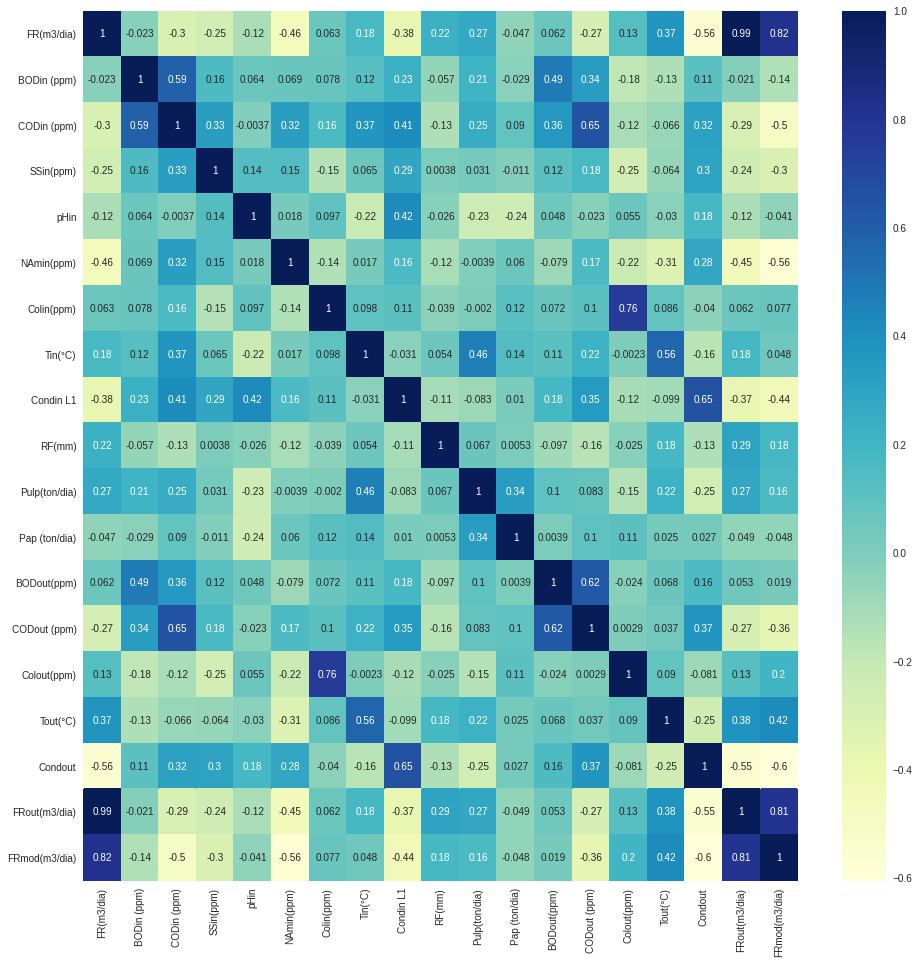

In [ ]:
plt.figure(figsize=(16,16))
sns.heatmap(interp.corr(),annot = True, cmap="YlGnBu")
plt.show()

#Checando a linearidade entre as variáveis


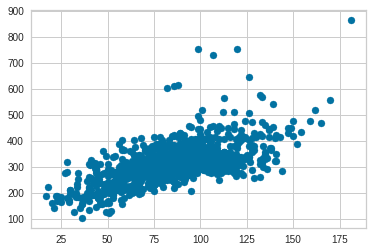

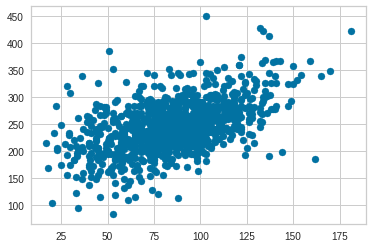

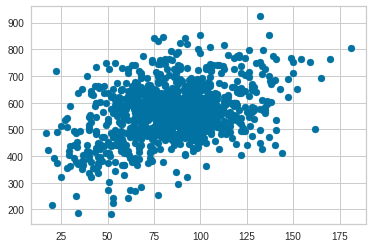

In [ ]:
# Os componentes da regressão devem teer relação linear com a variável de saída, isso não seria necessáriamente um teste de hipótese (eu acho, pelo menos eu não sei como fazer kkkkkkkk)
plt.scatter(BODout,CODout)
plt.show()
plt.scatter(BODout, BODin)
plt.show()
plt.scatter(BODout, CODin)
plt.show()

#Modelando o BOD


In [ ]:
#Modelo para o DBO de entrada (acho que não precisa mas Karla fez no dela então pode ser uma das modelagens extras que ela comentou :))
mod_BODin = sn.ols(formula= 'BODin~CODin+SSin+FRin+pHin+NAmin+Colin+Tin+RF+Pulp+Pap+Condin', data=modelar).fit()
print(mod_BODin.summary())

NameError: ignored

In [ ]:
#Modelo para o DBO de entrada ajustado (acho que não precisa mas Karla fez no dela então pode ser uma das modelagens extras que ela comentou :))
mod_BODinajust = sn.ols(formula= 'BODin~CODin+FRin+Tin', data=modelar).fit()
print(mod_BODinajust.summary())

                            OLS Regression Results                            
Dep. Variable:                  BODin   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.402
Method:                 Least Squares   F-statistic:                     239.8
Date:                Mon, 31 May 2021   Prob (F-statistic):          8.21e-119
Time:                        00:07:34   Log-Likelihood:                -5305.1
No. Observations:                1067   AIC:                         1.062e+04
Df Residuals:                    1063   BIC:                         1.064e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    141.9522     18.228      7.788      0.0

In [ ]:
#Modelando o BOD de saída
mod_BODout = sn.ols(formula= 'BODout~BODin+CODout+CODin+FRin+SSin+pHin+NAmin+Colin+Tin+RF+Pulp+Pap+Colout+Condout+Tout+Condin', data=modelar).fit()
print(mod_BODout.summary())

                            OLS Regression Results                            
Dep. Variable:                 BODout   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     90.83
Date:                Mon, 31 May 2021   Prob (F-statistic):          4.20e-185
Time:                        00:07:34   Log-Likelihood:                -4499.5
No. Observations:                1067   AIC:                             9033.
Df Residuals:                    1050   BIC:                             9117.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -53.7239     14.444     -3.719      0.0

In [ ]:
#Ajustando o modelo do BOD de saída
mod_BODoutajustado = sn.ols(formula= 'BODout~CODout+BODin+CODin', data=modelar).fit()
print(mod_BODoutajustado.summary())
pred_DBOout = mod_BODoutajustado.predict()

                            OLS Regression Results                            
Dep. Variable:                 BODout   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     424.2
Date:                Mon, 31 May 2021   Prob (F-statistic):          3.80e-181
Time:                        00:07:34   Log-Likelihood:                -4543.0
No. Observations:                1067   AIC:                             9094.
Df Residuals:                    1063   BIC:                             9114.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.6464      3.326     -1.397      0.1

,BODout_Real,BODout_pred
0,77.0,72.758626
1,116.0,107.755806
2,97.0,93.554635
3,112.0,73.518379
4,55.0,69.204107
...,...,...
1062,79.4,82.467131
1063,70.6,74.567623
1064,101.0,132.901549
1065,73.0,81.908945


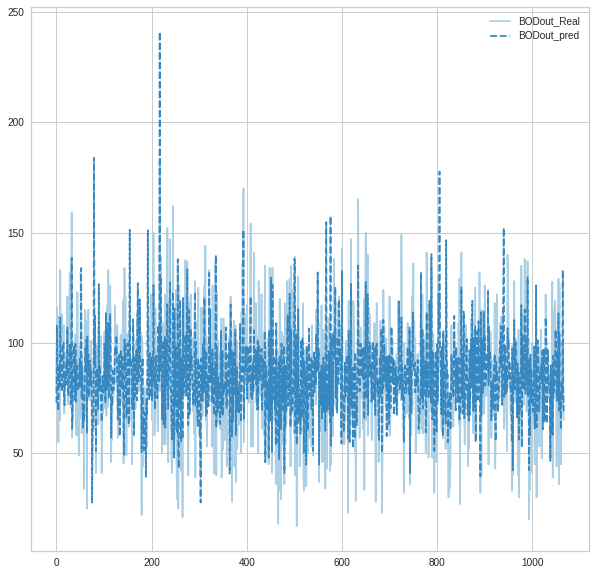

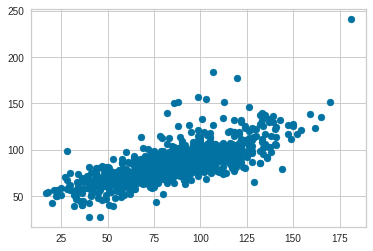

In [ ]:
teste_BODout = pd.DataFrame()
teste_BODout["BODout_Real"] = modelar['BODout(ppm)']
teste_BODout["BODout_pred"] = pred_DBOout
teste_BODout = teste_BODout.reset_index(drop=True)
display(teste_BODout)
plt.figure(figsize=(10,10))
sns.lineplot(data=teste_BODout, palette= "Blues")
plt.show()
plt.scatter(modelar['BODout(ppm)'], pred_DBOout)

,BODout_Real,BODout_pred
1066,77.0,70.784590
957,116.0,99.295922
209,97.0,99.325763
430,112.0,80.963774
140,55.0,73.315208
...,...,...
1100,79.4,78.689687
1135,70.6,68.219891
1299,101.0,112.507554
865,73.0,79.720964


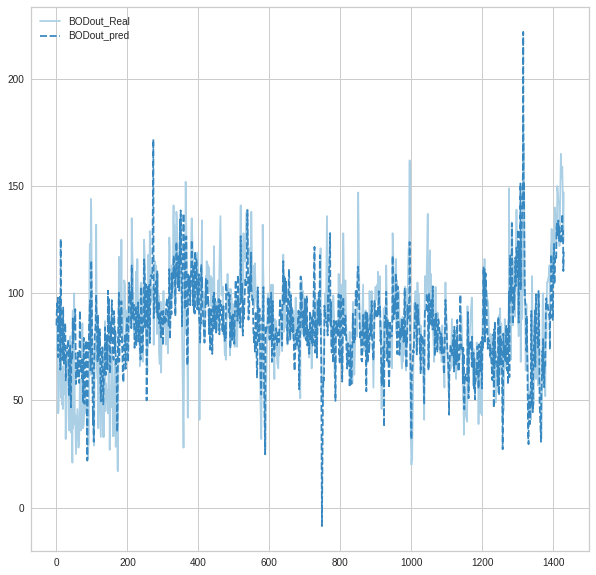

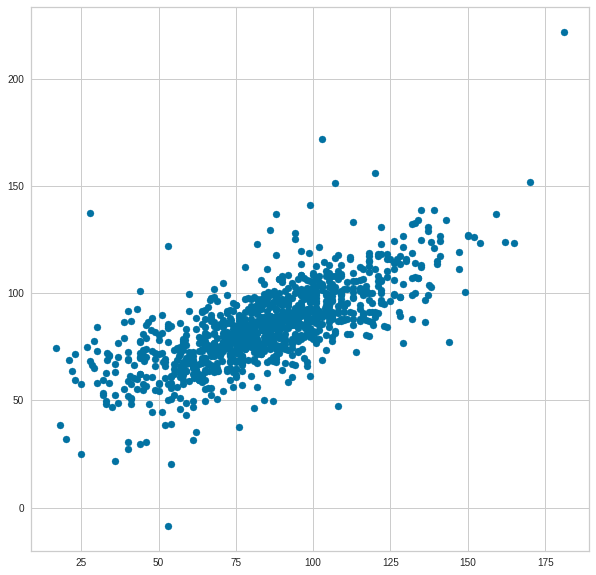

In [ ]:
#RESULTADO DA REGRESSÃO POR PLS FEITA NO MINITAB do BOD de saída
#Queria saber como mostrar alguma coisa para exemplificar a qualidade da regressão que nem Karla fei 
comp = pd.DataFrame()
comp["BODout_Real"] = modelar["BODout(ppm)"]
mod = comp["BODout_pred"] = ((-40.4634) + modelar["FR(m3/dia)"]*(0.0008) + modelar["BODin (ppm)"]*(0.3185) + modelar["CODin (ppm)"]*(-0.0747) + modelar["SSin(ppm)"]*(0.0040) + modelar["pHin"]*(-0.9853) + modelar["NAmin(ppm)"]*(-0.8085) + modelar["Colin(ppm)"]*(-0.0362) + modelar["Tin(°C)"]*(-0.0572) + modelar["Condin L1"]*(0.0039) + modelar["RF(mm)"]*(-0.1178) + modelar["Pulp(ton/dia)"]*(-0.0118) + modelar["Pap (ton/dia)"]*(0.0058) + modelar["CODout (ppm)"]*(0.1840) + modelar["Colout(ppm)"]*(0.0200) + modelar["Tout(°C)"]*(-0.5627) + modelar["Condout"]*(0.0098))
display(comp)
plt.figure(figsize=(10,10))
sns.lineplot(data=comp, palette= "Blues")
plt.show()
plt.figure(figsize=(10,10))
plt.scatter(BODout,mod)
plt.show()
#Queria saber como colocar aquelas linhas de confiança que nem Karla colocou no trabalho deela no gráfico


# Conferindo a normalidade do erro

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


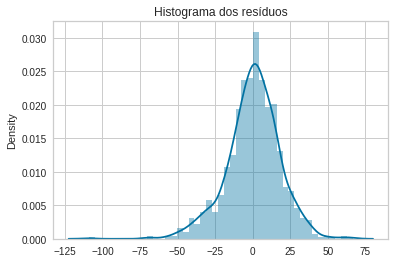

In [ ]:
#Erro = valores observados - valores preditos
dif = modelar["BODout(ppm)"] - mod
sns.distplot(dif)
plt.title ('Histograma dos resíduos')
plt.show()

In [ ]:
#Teste de Shapiro-Wilk para verificar a normalidade
from scipy.stats import shapiro
display(shapiro(dif))

#(estatística do teste, p-valor)

(0.9779794216156006, 1.1994604962040079e-11)

***Esse P vaalor quer dizer que não é normal né?***
Aí lenhou :(


#Modelando o COD

In [ ]:
mod_CODout = sn.ols(formula= 'CODout~BODin+CODin+BODout+FRin+SSin+pHin+NAmin+Colin+Tin+RF+Pulp+Pap+Colout+Condout+Tout+Condin', data=modelar).fit()
print(mod_CODout.summary())

                            OLS Regression Results                            
Dep. Variable:                 CODout   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     143.5
Date:                Mon, 31 May 2021   Prob (F-statistic):          8.50e-251
Time:                        00:07:36   Log-Likelihood:                -5492.1
No. Observations:                1067   AIC:                         1.102e+04
Df Residuals:                    1050   BIC:                         1.110e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.7113     36.857      0.453      0.6

In [ ]:
#Ajustando o modelo:
mod_CODoutajustado = sn.ols(formula= 'CODout~BODin+CODin+BODout+FRin+SSin+Condout+Tout', data=modelar).fit()
print(mod_CODoutajustado.summary())

                            OLS Regression Results                            
Dep. Variable:                 CODout   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     313.3
Date:                Mon, 31 May 2021   Prob (F-statistic):          7.05e-253
Time:                        00:07:36   Log-Likelihood:                -5511.9
No. Observations:                1067   AIC:                         1.104e+04
Df Residuals:                    1059   BIC:                         1.108e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     21.0779     27.032      0.780      0.4

#Intevalo de confiança


In [ ]:
#intervalos de confiança do 
intervalo = pd.DataFrame()
intervalo["Variaveis"] = ['FR(m3/dia)',	'BODin (ppm)',	'CODin (ppm)',	'SSin(ppm)',	'pHin',	'NAmin(ppm)',	'Colin(ppm)', 'Tin(°C)', 'Condin L1',	'RF(mm)', 'Pulp(ton/dia)',	'Pap (ton/dia)', 'BODout(ppm)',	'CODout (ppm)',	'Colout(ppm)',	'Tout(°C)',	'Condout',	'FRout(m3/dia)',	'FRmod(m3/dia)']
intervalo["min"], intervalo["max"] = stats.t.interval(0.95, len(interp)-1, loc=np.mean(interp), scale=stats.sem(interp))
display(intervalo)

,Variaveis,min,max
0,FR(m3/dia),66839.153107,68027.212318
1,BODin (ppm),243.272017,247.989965
2,CODin (ppm),556.945433,567.576703
3,SSin(ppm),124.603494,131.646682
4,pHin,7.389653,7.511489
5,NAmin(ppm),2.097868,2.264751
6,Colin(ppm),460.277863,473.121996
7,Tin(°C),45.324293,45.611097
8,Condin L1,1508.979113,1545.495237
9,RF(mm),4.238893,5.262020


#Lixo, verificar se podemos remover



In [ ]:
from sklearn.cross_decomposition import PLSRegression 
from sklearn.metrics import mean_squared_error, r2_score  
from sklearn.model_selection import cross_val_predict 
y_cv = pd.DataFrame()  
pls = pd.DataFrame()
pls = PLSRegression(n_components=5)    
pls.fit(CODin,BODin) 
y_cv = cross_val_predict(pls, CODin, BODin, cv=10)    
score = r2_score(BODin, y_cv)  
mse = mean_squared_error(BODin, y_cv)


ValueError: ignored

In [ ]:
#Substituindo NAs pela mediana 
df_t = df.fillna(df.median(), inplace=False)

In [ ]:
from sklearn.cross_decomposition import PLSRegression
mod = pd.DataFrame()
X = [FRin, BODin]
Y = [modelar["BODout(ppm)"], BODout]
pls2 = PLSRegression(n_components=2)
pls2.fit(X, Y)
PLSRegression()
mod = pls2.predict(X)
display(mod)

In [ ]:
#Testando o preenchimento dos faltantes com a mediana
plt.scatter(df_t['Unnamed: 0'],df_t['NAmin(ppm)'])
plt.show()

In [ ]:
df2 = df.dropna()
df2.describe()

In [ ]:
clf = df.Line
# Build step forward feature selection
sfs1 = sfs(clf,k_features = 10,forward=True,floating=False, scoring='r2',cv=5)

# Perform SFFS
df2 = df2.fit(X_train, y_train)

In [ ]:
#Comparação entre dados brutos com NAs e dados onde os faltantes foram preenchidos por meio de interpolação
plt.figure(figsize = (20,7) )
plt.subplot (1,2,1)
plt.scatter(df['Unnamed: 0'],df['NAmin(ppm)'])
plt.subplot (1,2,2)
plt.scatter(interp['Unnamed: 0'],interp['NAmin(ppm)'])
plt.show()

Com base na análise desse gráfico podemos observar que o primeiro componente do 
modelo de regressão deve ser o BODin para prever o BODout e o CODin para prever o CODout, assim como era esperado.

In [ ]:
from sklearn.cross_decomposition import PLSRegression  
from sklearn.metrics import mean_squared_error, r2_score  
from sklearn.model_selection import cross_val_predict    
# Define PLS object  
pls = PLSRegression(n_components=2)    
# Fit  
pls.fit(modelar["CODin (ppm)"], modelar["BODin (ppm)"])  
# Cross-validation  
y_cv = cross_val_predict(pls, CODin, BODin, cv=10)    
# Calculate scores  ]
score = r2_score(y, y_cv)  
mse = mean_squared_error(y, y_cv)